# Machine Learning: Supervised Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees:-Regresión" data-toc-modified-id="Decision-Trees:-Regresión-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Trees: Regresión</a></span><ul class="toc-item"><li><span><a href="#Ejercicio" data-toc-modified-id="Ejercicio-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ejercicio</a></span></li></ul></li><li><span><a href="#Decision-Tree:-Clasificación" data-toc-modified-id="Decision-Tree:-Clasificación-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Tree: Clasificación</a></span><ul class="toc-item"><li><span><a href="#Ejercicio" data-toc-modified-id="Ejercicio-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ejercicio</a></span></li></ul></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forests</a></span><ul class="toc-item"><li><span><a href="#Seleccionando-los-parámetros-de-un-bosque-utilizando-Cross-Validation" data-toc-modified-id="Seleccionando-los-parámetros-de-un-bosque-utilizando-Cross-Validation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Seleccionando los parámetros de un bosque utilizando Cross-Validation</a></span></li></ul></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Ejercicio:-Gradient-Boosting-con-cross-validation" data-toc-modified-id="Ejercicio:-Gradient-Boosting-con-cross-validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ejercicio: Gradient Boosting con cross-validation</a></span></li></ul></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-1" data-toc-modified-id="Ejercicio-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ejercicio 1</a></span></li><li><span><a href="#Ejercicio-2" data-toc-modified-id="Ejercicio-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ejercicio 2</a></span></li></ul></li></ul></div>

# Regresión y Clasificación: Métodos basados en Árboles

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision Trees: Regresión

Vamos a empezar con un ejemplo de árboles de Regresión. Para ello crearemos un árbol de decisión que intentará ajustar los datos sinténticos que vamos a crear a continuación:

In [2]:
np.random.seed(0)
X = np.linspace(-3 , 3, 1000).reshape(1000, 1)
y = np.sin(4 * X) + X

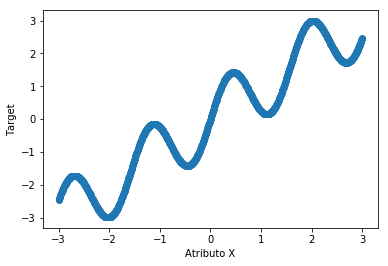

In [3]:
plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target")

plt.show()

In [4]:
np.random.seed(0)
X = np.linspace(-3 , 3, 1000).reshape(1000, 1)
y = np.sin(4 * X) + X
y = y + np.random.normal(size=len(X)).reshape(y.shape)

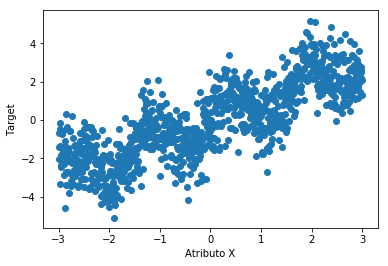

In [5]:
plt.scatter(X, y)
plt.xlabel("Atributo X")
plt.ylabel("Target")

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [7]:
depth = 5

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

regr = DecisionTreeRegressor(max_depth=depth)
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7955758617525174
0.7202854325532362


In [9]:
X_fit = np.linspace(-3, 3, 1000).reshape(1000, 1)
y_fit = regr.predict(X_fit)

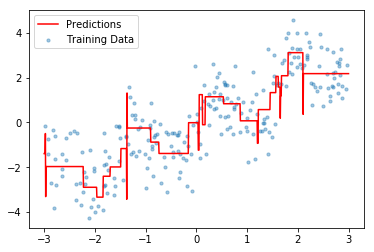

In [10]:
plt.scatter(X_test, y_test, label="Training Data", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predictions")
plt.legend()

plt.show()

**Como vemos, el modelo genera zonas con líneas planas muy anchas (bias) y zonas con cambios verticales muy bruscos ajustándose a uno o muy pocos puntos (overfitting)**.

Esto es uno de los problemas típicos de los árboles que se puede controlar con la profundidad del mismo. 

### Ejercicio

- Probad varios parámetros de profundidad y observad como aumentan el bias y la varianza del modelo.

## Decision Tree: Clasificación

Los problemas de clasificación también se pueden resolver árboles de decisión.


In [11]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(centers=2, random_state=61526, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

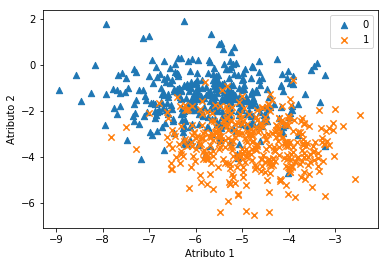

In [13]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s=40,
            label="0", marker="^")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s=40,
            label="1", marker="x")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend()

plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
depth = 3

In [16]:
clf = DecisionTreeClassifier(max_depth=depth)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8746666666666667
0.828


In [17]:
from src import figures

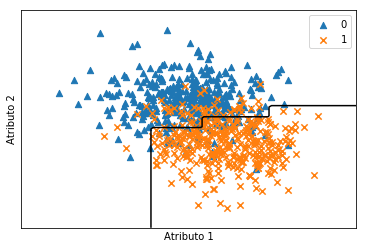

In [18]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], s=40,
            label="0", marker="^")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], s=40,
            label="1", marker="x")
figures.plot_2d_separator(clf, X_train)

plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.legend()

plt.show()

A revisar

In [36]:
import graphviz
from sklearn import tree

In [32]:
import sys
sys.path.append("/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/graphviz/")

In [33]:
sys.path

['',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python35.zip',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/plat-linux',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/lib-dynload',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/IPython/extensions',
 '/bk/bigdata/working_dir/bancadigital/se07080/.ipython',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/graphviz/',
 '/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/graphviz']

In [37]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [26]:
tree.export_graphviz?

 ### Ejercicio

- Probad a entrenar el modelo árboles más profundos.

In [ ]:
# Aqui su respuesta

## Random Forests

Random Forests son ensamblajes de muchos árboles entrenados con diferentes subconjuntos de datos y diferentes subconjuntos de variables del dataset de entrenamiento. 
Esto permite que los árboles del bosque sean diferentes entre ellos. De hecho, cada árbol se especializa en un aspecto diferente del dataset (sobreajusta al subconjunto de datos con los que se ha entrenado ese árbol), pero como la predicción es un promedio de las predicciones de todos los árboles, al final el bosque es capaz de reducir la varianza (overfitting).

### Seleccionando los parámetros de un bosque utilizando Cross-Validation

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [39]:
X.shape

(1797, 64)

In [40]:
y.shape

(1797,)

In [41]:
pd.crosstab(y, columns="counts")

col_0,counts
row_0,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


In [42]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [50]:
idx = 2

In [51]:
img = X[idx,:].reshape(8, 8)

In [44]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

2


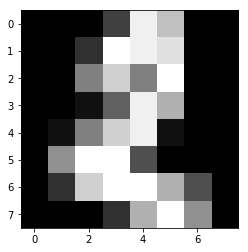

In [52]:
print(y[idx])
plt.imshow(img, cmap="gray")
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {"n_estimators" : [10, 50, 100, 200],
         "max_depth" : [5, 7, 9],
         "max_features": [10, "sqrt"]}

In [61]:
clf_grid = GridSearchCV(clf, params, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [10, 'sqrt'], 'max_depth': [5, 7, 9], 'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
clf_grid.best_params_

{'max_depth': 9, 'max_features': 10, 'n_estimators': 200}

In [63]:
print(clf_grid.score(X_train, y_train), clf_grid.score(X_test, y_test))

1.0 0.9711111111111111


In [64]:
clf_grid.grid_scores_

/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.89829, std: 0.01430, params: {'max_features': 10, 'max_depth': 5, 'n_estimators': 10},
 mean: 0.92947, std: 0.00258, params: {'max_features': 10, 'max_depth': 5, 'n_estimators': 50},
 mean: 0.93467, std: 0.00707, params: {'max_features': 10, 'max_depth': 5, 'n_estimators': 100},
 mean: 0.93318, std: 0.00702, params: {'max_features': 10, 'max_depth': 5, 'n_estimators': 200},
 mean: 0.88419, std: 0.01793, params: {'max_features': 'sqrt', 'max_depth': 5, 'n_estimators': 10},
 mean: 0.92428, std: 0.01701, params: {'max_features': 'sqrt', 'max_depth': 5, 'n_estimators': 50},
 mean: 0.93764, std: 0.00930, params: {'max_features': 'sqrt', 'max_depth': 5, 'n_estimators': 100},
 mean: 0.93912, std: 0.00976, params: {'max_features': 'sqrt', 'max_depth': 5, 'n_estimators': 200},
 mean: 0.92131, std: 0.00426, params: {'max_features': 10, 'max_depth': 7, 'n_estimators': 10},
 mean: 0.95100, std: 0.00987, params: {'max_features': 10, 'max_depth': 7, 'n_estimators': 50},
 mean: 0.95694, std:

Este tipo de modelos no nos devuelve un parámetro con el que establecer la relación entre los atributos y la variable respuesta. Sin embargo, podemos obtener la **importancia** de cada atributo (*feature importance*) en el modelo. Por importancia se entiende la contribución promedio de cada atributo en la disminución de la impureza en cada árbol.

In [65]:
clf_grid.best_estimator_.feature_importances_

array([0.00000000e+00, 1.85977841e-03, 1.87172519e-02, 9.71991235e-03,
       7.42019585e-03, 1.61302462e-02, 7.20589804e-03, 5.02373897e-04,
       3.69045579e-05, 1.00500583e-02, 2.88981288e-02, 5.67252409e-03,
       1.46748871e-02, 2.84140933e-02, 5.05476073e-03, 2.79537339e-04,
       2.22956759e-05, 6.25247271e-03, 2.08202664e-02, 2.53459798e-02,
       2.85119830e-02, 5.04365296e-02, 7.59512463e-03, 2.15719190e-04,
       5.65451620e-05, 1.33515782e-02, 4.29665992e-02, 2.84793483e-02,
       3.58746183e-02, 2.12928662e-02, 3.22065240e-02, 1.53300227e-05,
       0.00000000e+00, 2.82527597e-02, 3.00286423e-02, 1.44163172e-02,
       4.49053869e-02, 1.59416603e-02, 2.86454315e-02, 0.00000000e+00,
       2.16771950e-05, 7.69837203e-03, 4.17478614e-02, 4.54418797e-02,
       2.13067573e-02, 1.83305770e-02, 2.07498989e-02, 2.48649933e-05,
       1.43324448e-05, 1.83112276e-03, 1.53360767e-02, 2.05573224e-02,
       1.27952101e-02, 2.34126405e-02, 2.46298473e-02, 2.04920248e-03,
      

In [66]:
fimp = pd.DataFrame({"importance" : clf_grid.best_estimator_.feature_importances_})

In [67]:
fimp.head(3)

,importance
0,0.000000
1,0.001860
2,0.018717


In [68]:
fimp.sort_values("importance", ascending=False, inplace=True)

In [ ]:
fimp.index.tolist()

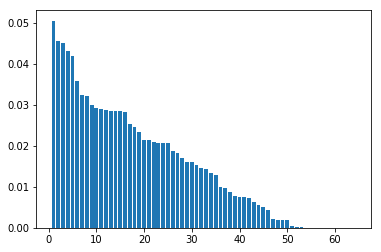

In [69]:
plt.bar(np.arange(1, fimp.shape[0] + 1), fimp["importance"])

plt.show()

In [70]:
RandomForestClassifier?

## Gradient Boosting

Otro método de ensemble es *Boosting*. Aquí, en lugar de construir 200 estimadores en paralelo (como hacíamos en el bosque anterior), construimos una cadena de 200 estimadores que iterativamente van refinando los resultados del estimador anterior. La idea de boosting es que, utilizar modelos muy simples y rápidos secuencialmente nos permite obtener un error menor que el que pueden obtener los distintos estimadores individualmente.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
clf = GradientBoostingClassifier()
params = {"n_estimators" : [200, 1000],
         "subsample" : [0.5, 0.75]}
clf_grid = GridSearchCV(clf, params, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
clf_grid.best_params_

In [ ]:
print(clf_grid.score(X_train, y_train), clf_grid.score(X_test, y_test))

In [78]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25,
                                 max_depth=5, subsample=0.75)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
plt.bar(np.arange(1, fimp.shape[0] + 1), fimp["importance"], width=0.5)
plt.bar(np.arange(1, fimp.shape[0] + 1)+0.5, clf.feature_importances_[fimp.index], width=0.5)

plt.show()

### Ejercicio: Gradient Boosting con cross-validation

- Utilizad una búsqueda en grid para optimizar los parámetros `learning_rate` (0.01-1) y `max_depth` (1-9) de un Gradient Boosted Trees en el dataset de *Digits*

## XGBoost

**XGBoost** es un algoritmo de Gradient Boosting aplicado tanto a problemas de regresión como de clasificación. XGBoost se diferencia de otros algoritmos de Boosting por su nivel de **optimización** en términos de velocidad de entrenamiento, así como de rendimiento. Suele ser la primera opción a utilizar en competiciones de Data Science.

Docs: https://xgboost.readthedocs.io/en/latest/python/index.html

In [5]:
import xgboost as xgb

Params Doc: https://xgboost.readthedocs.io/en/latest/parameter.html

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [13]:
params = {"max_depth":5, "eta":0.25, "subsample":0.5,
          "objetive":"multi:softprob", "num_class":10}
n_round = 200

In [14]:
model = xgb.train(params, dtrain, n_round)

[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[12:38:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

In [17]:
preds = model.predict(dtest)
preds[:5]

array([6., 9., 3., 7., 2.], dtype=float32)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9688888888888889

In [19]:
model.get_fscore()

{'f1': 9,
 'f10': 106,
 'f11': 52,
 'f12': 86,
 'f13': 81,
 'f14': 35,
 'f15': 1,
 'f17': 40,
 'f18': 101,
 'f19': 95,
 'f2': 73,
 'f20': 107,
 'f21': 153,
 'f22': 37,
 'f25': 36,
 'f26': 163,
 'f27': 150,
 'f28': 74,
 'f29': 90,
 'f3': 72,
 'f30': 47,
 'f33': 54,
 'f34': 71,
 'f35': 81,
 'f36': 104,
 'f37': 65,
 'f38': 59,
 'f4': 111,
 'f41': 25,
 'f42': 137,
 'f43': 147,
 'f44': 90,
 'f45': 93,
 'f46': 53,
 'f49': 9,
 'f5': 113,
 'f50': 94,
 'f51': 125,
 'f52': 101,
 'f53': 103,
 'f54': 70,
 'f55': 3,
 'f57': 2,
 'f58': 71,
 'f59': 60,
 'f6': 28,
 'f60': 54,
 'f61': 108,
 'f62': 41,
 'f63': 15,
 'f7': 1,
 'f9': 46}

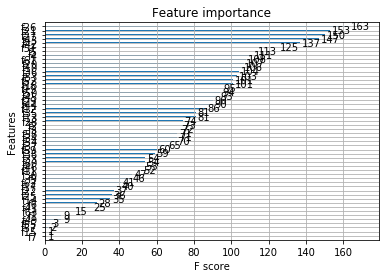

In [20]:
xgb.plot_importance(model)

In [22]:
help(xgb.cv)

Help on function cv in module xgboost.training:

cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
    Cross-validation with given parameters.
    
    Parameters
    ----------
    params : dict
        Booster params.
    dtrain : DMatrix
        Data to be trained.
    num_boost_round : int
        Number of boosting iterations.
    nfold : int
        Number of folds in CV.
    stratified : bool
        Perform stratified sampling.
    folds : a KFold or StratifiedKFold instance or list of fold indices
        Sklearn KFolds or StratifiedKFolds object.
        Alternatively may explicitly pass sample indices for each fold.
        For `n` folds, `folds` should be a length `n` list of tuples.
        Each tuple is `(in,out)` where `in` is a list of indices to be used
        a

También podemos utilizar una interfaz similar a `sklearn` y utilizar funciones propias de este módulo como `GridSearchCV`:

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
clf = XGBClassifier()

In [25]:
params = {"n_estimators" : [100, 200, 500],
         "learning_rate" : [0.25, 0.75],
         "subsample" : [0.25, 0.75]}

In [28]:
clf_grid = GridSearchCV(clf, params, cv=3)
clf_grid.fit(X_train, y_train)

/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.25, 0.75], 'learning_rate': [0.25, 0.75], 'n_estimators': [100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
clf_grid.best_params_

{'learning_rate': 0.25, 'n_estimators': 200, 'subsample': 0.25}

In [31]:
clf_grid.score(X_train, y_train), clf_grid.score(X_test, y_test)

/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/bk/bigdata/working_dir/bancadigital/se07080/bk/anaconda/envs/p_se07080/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(1.0, 0.9644444444444444)

## Ejercicios

### Ejercicio 1

Ajustar un **Random Forest** seleccionando hiperparámetros mediante **Cross-Validation** al dataset `diabetes`. Comparar la performance del algoritmo con la obtenida previamente con la **regresiones lineal**.

Para cargar el dataset:

In [408]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
# Aqui su respuesta

### Ejercicio 2

Replicar el ejercicio anterior pero en este caso ajustando el algoritmo de **Gradient Boosting**.

In [ ]:
# Aqui su respuesta